In [1]:
from tqdm import tqdm
import scanpy as sc

In [2]:
from numpy import var


sample_folders = [
    "GSM4456251_ALL1",
    "GSM4456252_ALL3",
    "GSM4456253_ALL8",
    "GSM4456254_ALL9",
    "GSM4456255_ALL10",
    "GSM4456256_ALL12",
    "GSM4456257_ALL10-d15",
    "GSM4456258_ALL12-d15",
    "GSM4795824_REH_DMSO",
    "GSM4795825_REH_TK",
    "GSM4795826_REH_XR",
]

switched_sample_folders = [
    "GSM4795824_REH_DMSO",
    "GSM4795825_REH_TK",
    "GSM4795826_REH_XR",
]

# Create an empty list first
adata_list = []

# use a for-loop to read in all the files
for sample in tqdm(sample_folders):
    pathname = "/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/" + sample
    print("Reading files at:" + pathname)
    if sample in switched_sample_folders:
        adata = sc.read_10x_mtx(
            "/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/" + sample,
            var_names="gene_ids",
        )
    else:
        adata = sc.read_10x_mtx(
            "/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/" + sample
        )
    patient_id = sample[:4]  # extract the patient info
    sample_id = sample  # extract the sample info
    # we add the patient and sample information into our adata object, specifically, the .obs slot
    # .obs stands for observation i.e every single-cell is an observation
    adata.obs["patient_id"] = patient_id
    adata.obs["sample_id"] = sample_id
    # the function will complain that we need to run this
    adata.var_names_make_unique()  # a var, stands for variable i.e. genes. so this function is to make the gene names unique
    # why? because multiple ensembl gene ids can map to the same gene e.g. spliced isoforms. sometimes we care about spliced isoforms and we want to keep them separate
    # so something like IL6, would be become IL6 and IL6-1
    adata_list.append(adata)  # append to my adata_list above, iteratively

# finally, concatenate all the objects into a singlular one
adata = sc.concat(adata_list)
# print what the final object looks like
adata

  0%|          | 0/11 [00:00<?, ?it/s]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4456251_ALL1


  9%|▉         | 1/11 [00:17<02:57, 17.78s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4456252_ALL3


 18%|█▊        | 2/11 [00:35<02:37, 17.51s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4456253_ALL8


 27%|██▋       | 3/11 [00:51<02:16, 17.01s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4456254_ALL9


 36%|███▋      | 4/11 [01:27<02:52, 24.61s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4456255_ALL10


 45%|████▌     | 5/11 [02:04<02:54, 29.11s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4456256_ALL12


 55%|█████▍    | 6/11 [02:20<02:03, 24.66s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4456257_ALL10-d15


 64%|██████▎   | 7/11 [02:58<01:56, 29.04s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4456258_ALL12-d15


 73%|███████▎  | 8/11 [03:17<01:16, 25.59s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4795824_REH_DMSO


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 82%|████████▏ | 9/11 [03:25<00:40, 20.11s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4795825_REH_TK


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
 91%|█████████ | 10/11 [03:45<00:20, 20.20s/it]

Reading files at:/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSM4795826_REH_XR


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
100%|██████████| 11/11 [04:09<00:00, 22.68s/it]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 56271 × 32738
    obs: 'patient_id', 'sample_id'

In [4]:
adata.write_h5ad("/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/adata_rb.h5ad", compression="gzip")

In [5]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

adata = sc.read_h5ad("/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/adata_rb.h5ad")
adata

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/umap/d

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.5 pynndescent==0.5.10


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 56271 × 32738
    obs: 'patient_id', 'sample_id'

In [6]:
import os
os.makedirs('write', exist_ok=True)
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results
adata.write(results_file)
#adata = sc.read_10x_mtx('/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/ALL1',
    #var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    #cache=True)                             # write a cache file for faster subsequent reading


#adata = sc.read_10x_mtx(
    #'data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    #var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    #cache=True)                              # write a cache file for faster subsequent reading

#adata.var_names_make_unique()
print(adata)

AnnData object with n_obs × n_vars = 56271 × 32738
    obs: 'patient_id', 'sample_id'


normalizing counts per cell
    finished (0:00:00)


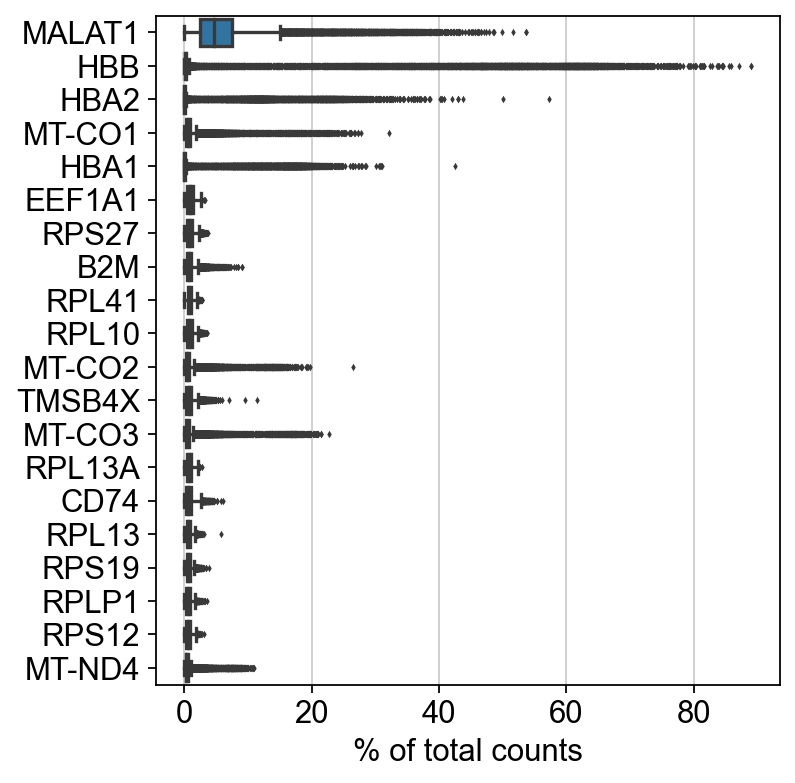

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20,)
#Show those genes that yield the highest fraction of counts in each single cell, across all cells.

In [8]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1278 cells that have less than 200 genes expressed


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


filtered out 10608 genes that are detected in less than 3 cells


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
#Mitochondrial genes for quality control.

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


A violin plot of some of the computed quality measures:

the number of genes expressed in the count matrix
the total counts per cell
the percentage of counts in mitochondrial genes

High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


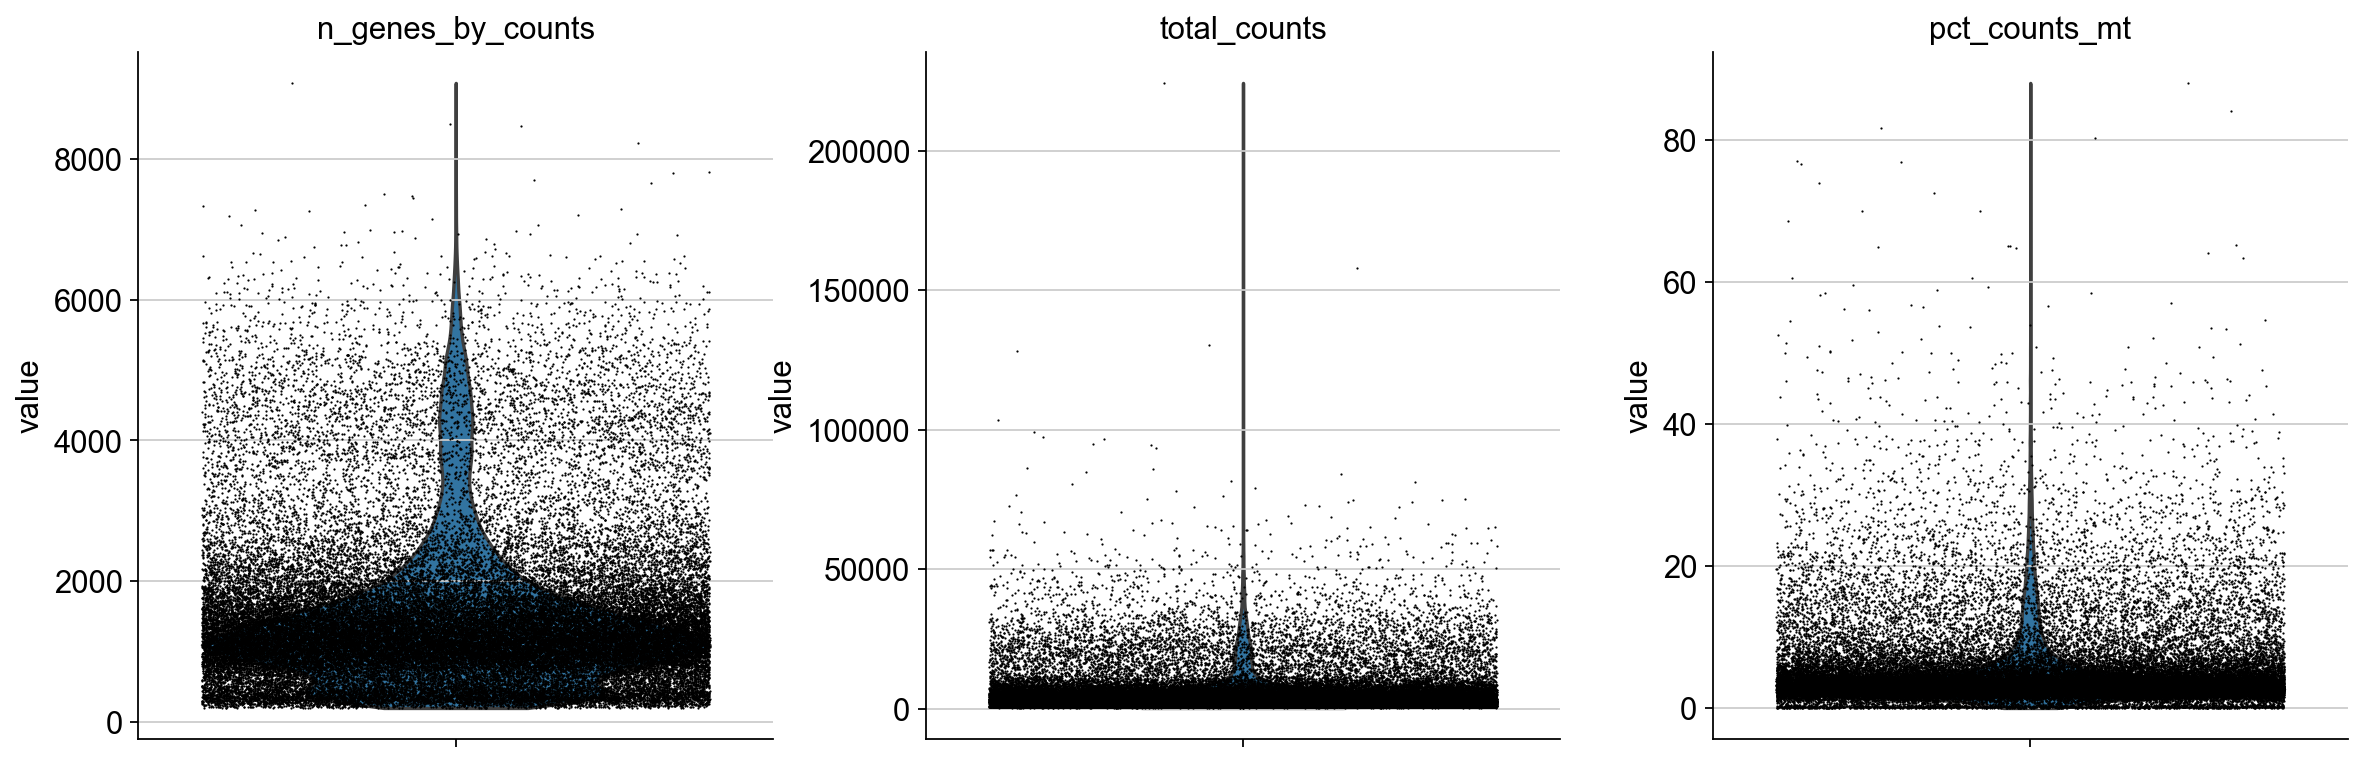

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)


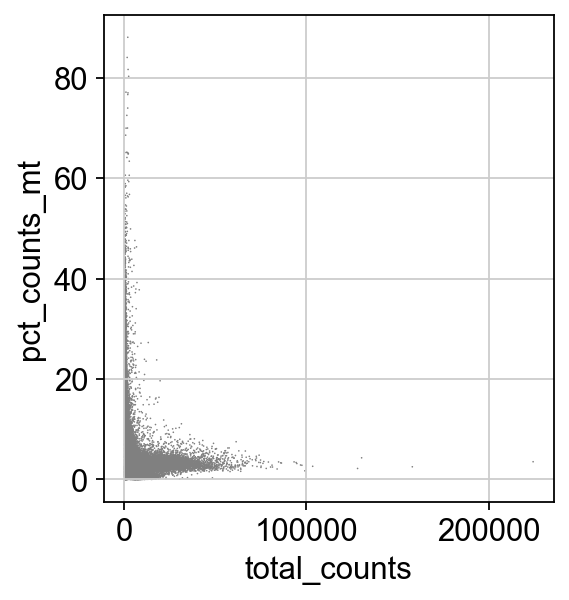

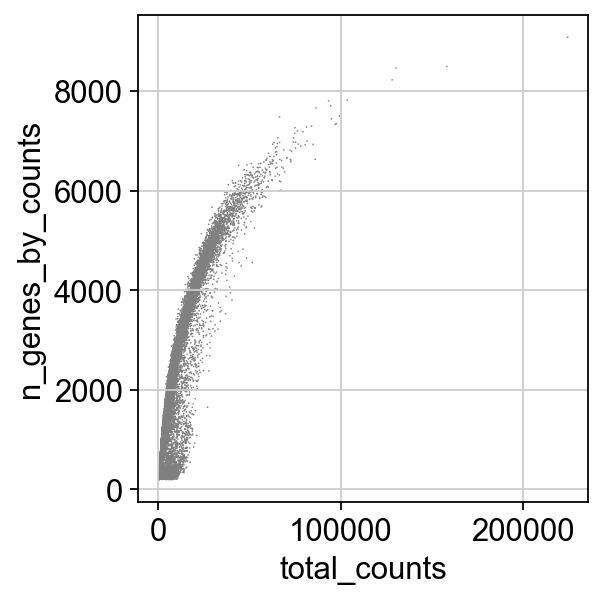

In [11]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [12]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:00:00)


In [13]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


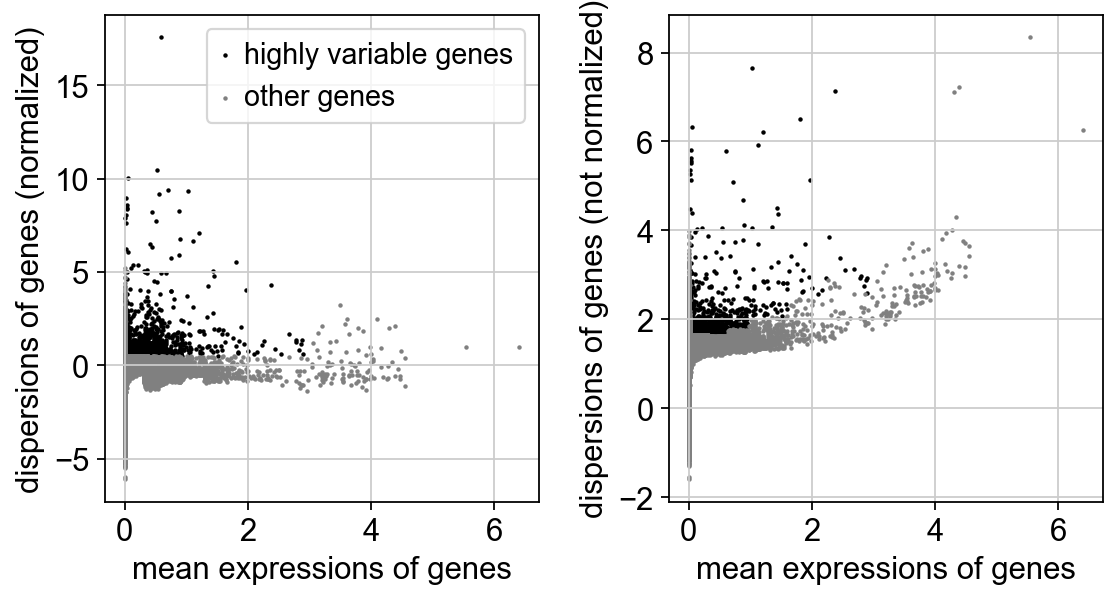

In [14]:
sc.pl.highly_variable_genes(adata)


In [15]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]


In [16]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)


regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


    finished (0:01:39)


In [17]:
#Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:15)


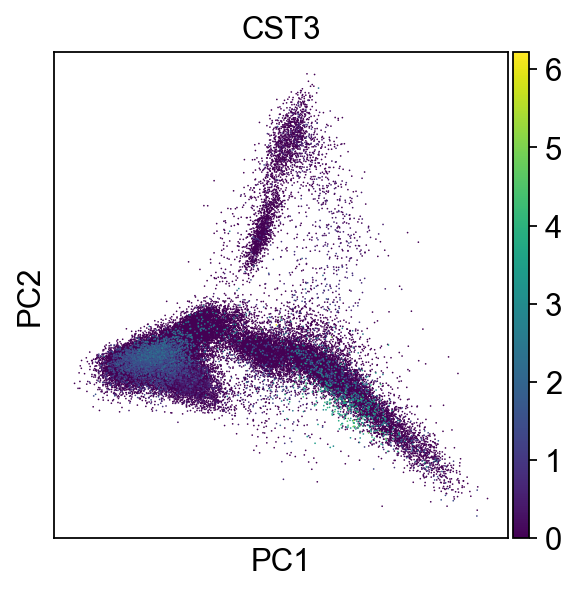

In [18]:
sc.pl.pca(adata, color='CST3')

In [19]:
adata.write(results_file)

What are the Single PCs to the total variance in the data. 

This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function sc.tl.louvain() or tSNE sc.tl.tsne(). In our experience, often a rough estimate of the number of PCs does fine.

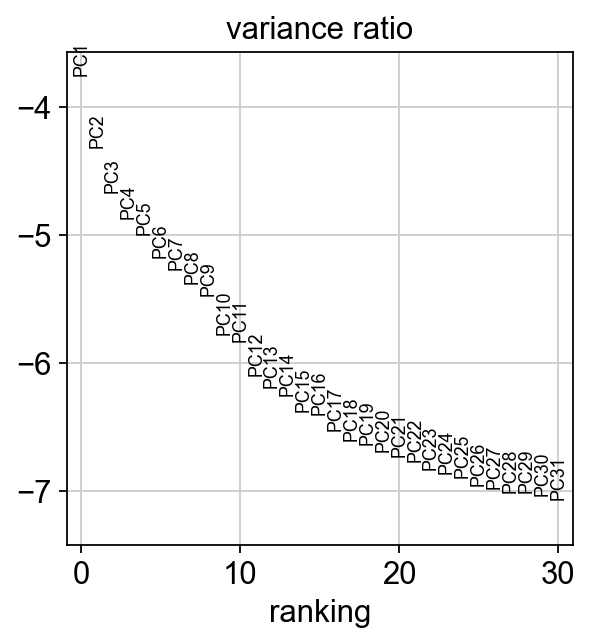

In [20]:
sc.pl.pca_variance_ratio(adata, log=True)

In [21]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 53007 × 2490
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [22]:
#Computing the neighborhood graph
#compute the neighborhood graph of cells using the PCA representation of the data matrix.

sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)


In [23]:
#Embedding the neighborhood graph
#embedding the graph in two dimensions using UMAP -> potentially more faithful to the global connectivity of the manifold than tSNE, 
#i.e., it better preserves trajectories. In some ocassions, you might still observe disconnected clusters and similar connectivity violations

sc.tl.leiden(adata)
sc.tl.umap(adata)

running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:44)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:32)


In [24]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:33)


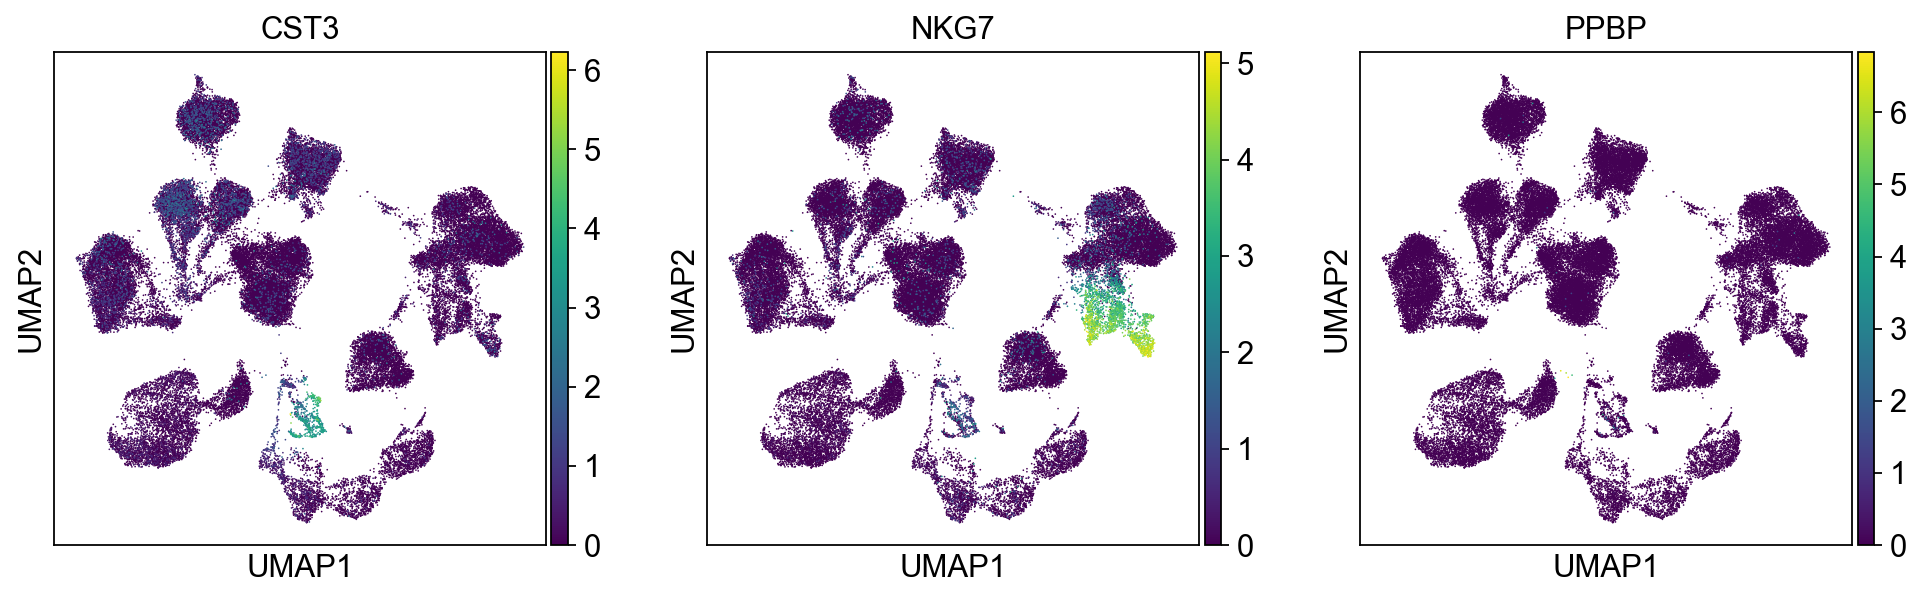

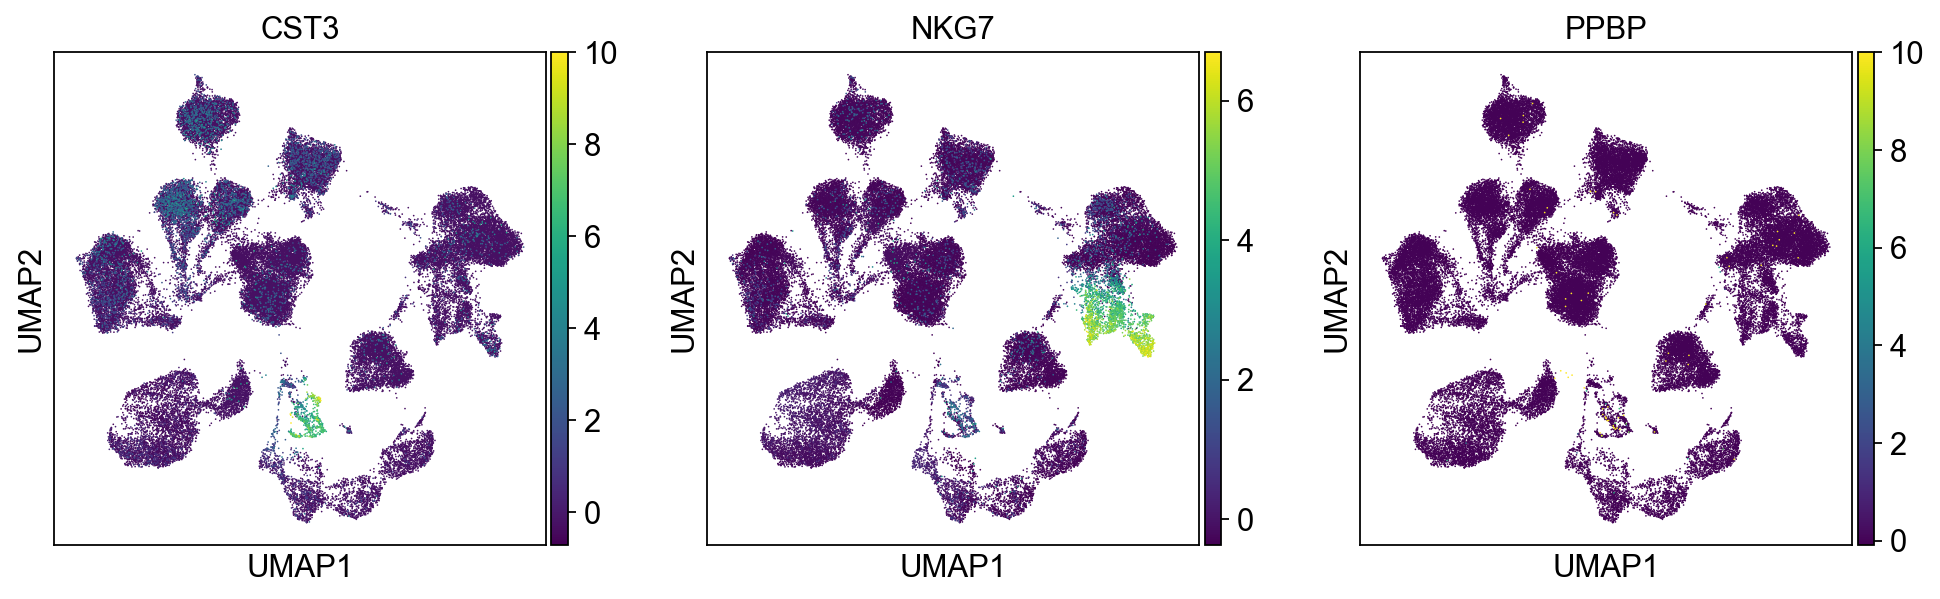

In [25]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


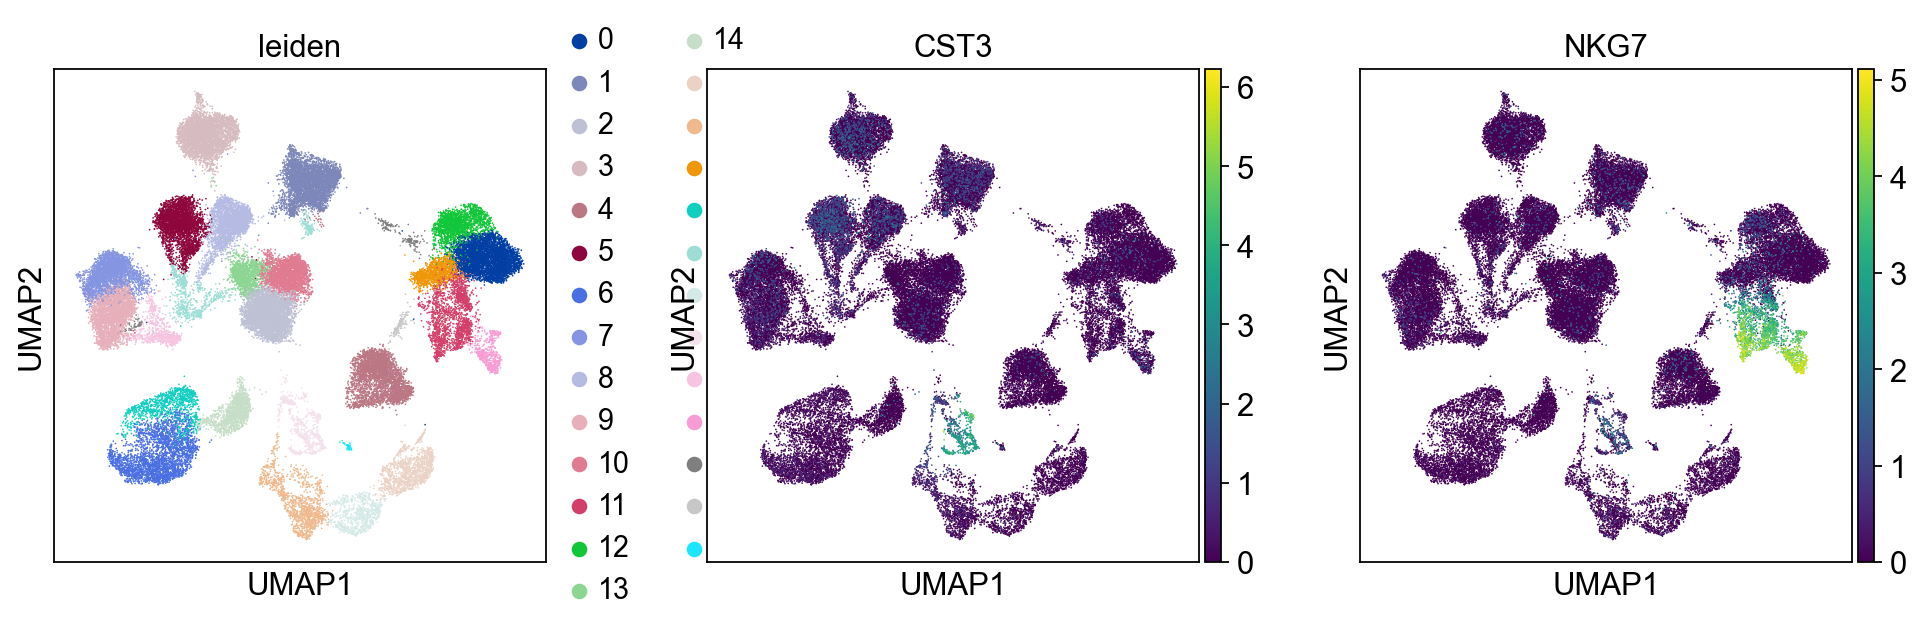

In [26]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])
adata.write(results_file)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:22)


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perform

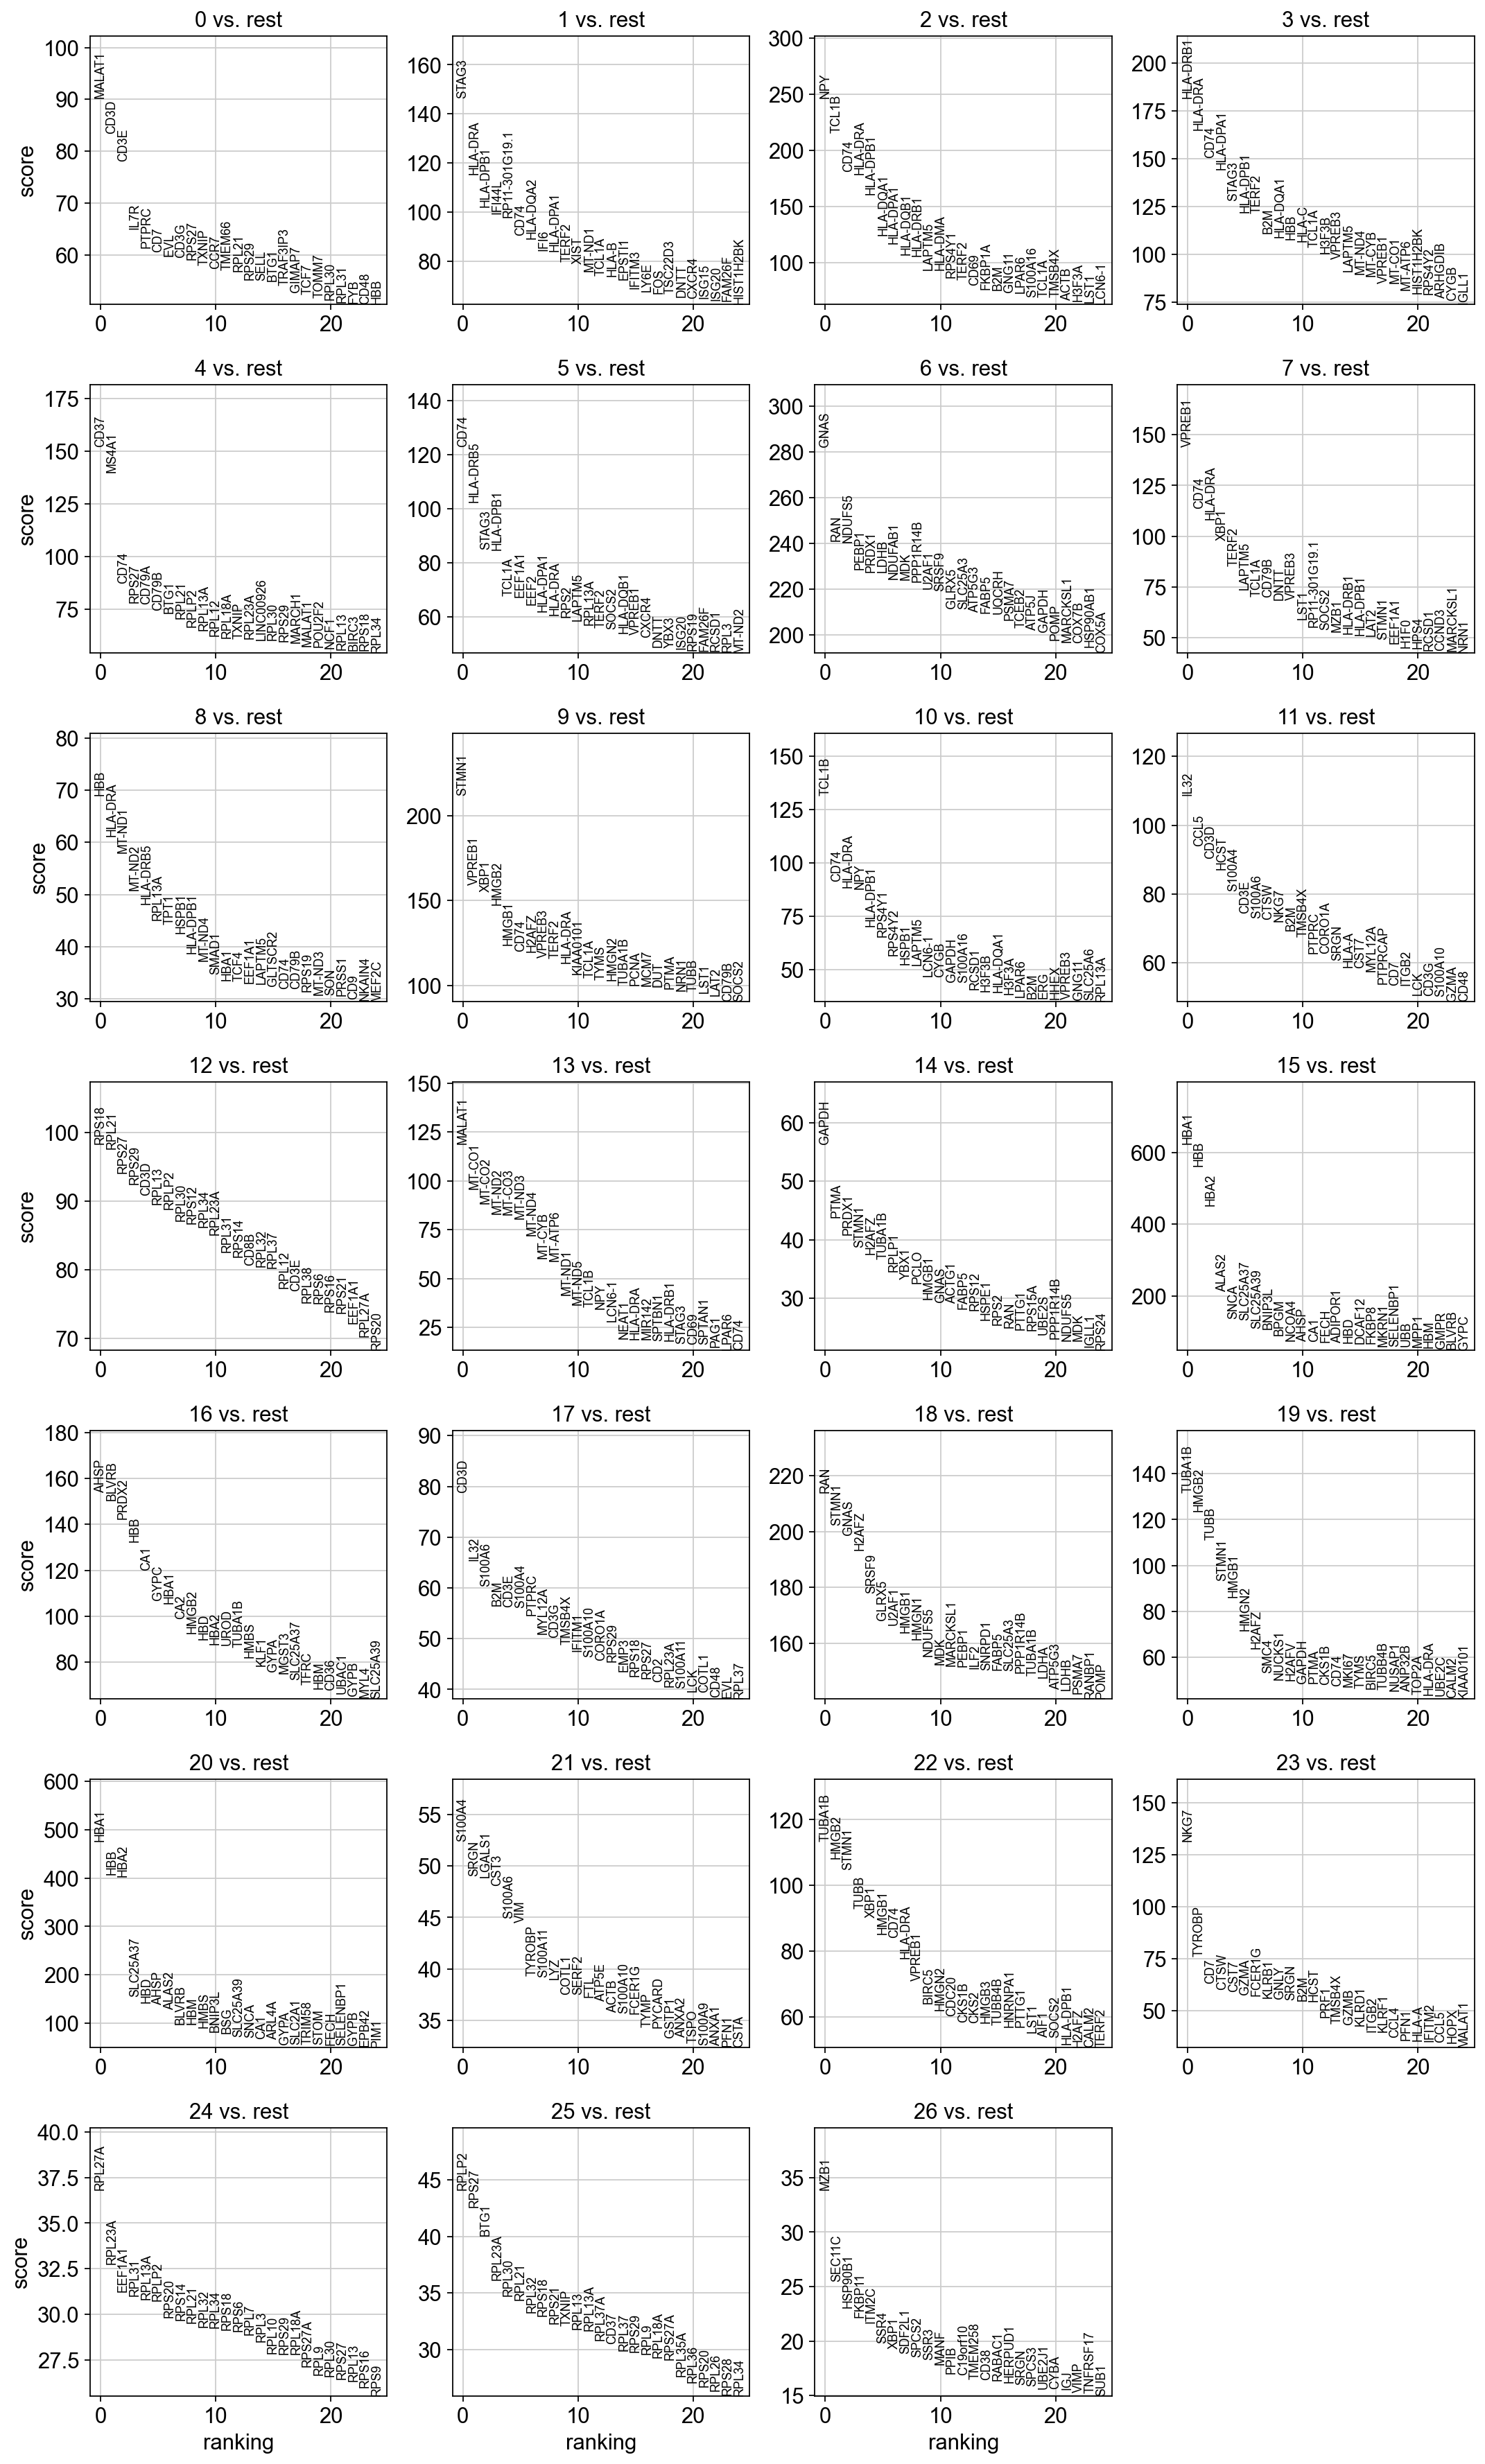

In [27]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


In [28]:
sc.settings.verbosity = 2  # reduce the verbosity
adata.write(results_file)


ranking genes
    finished (0:07:04)


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perform

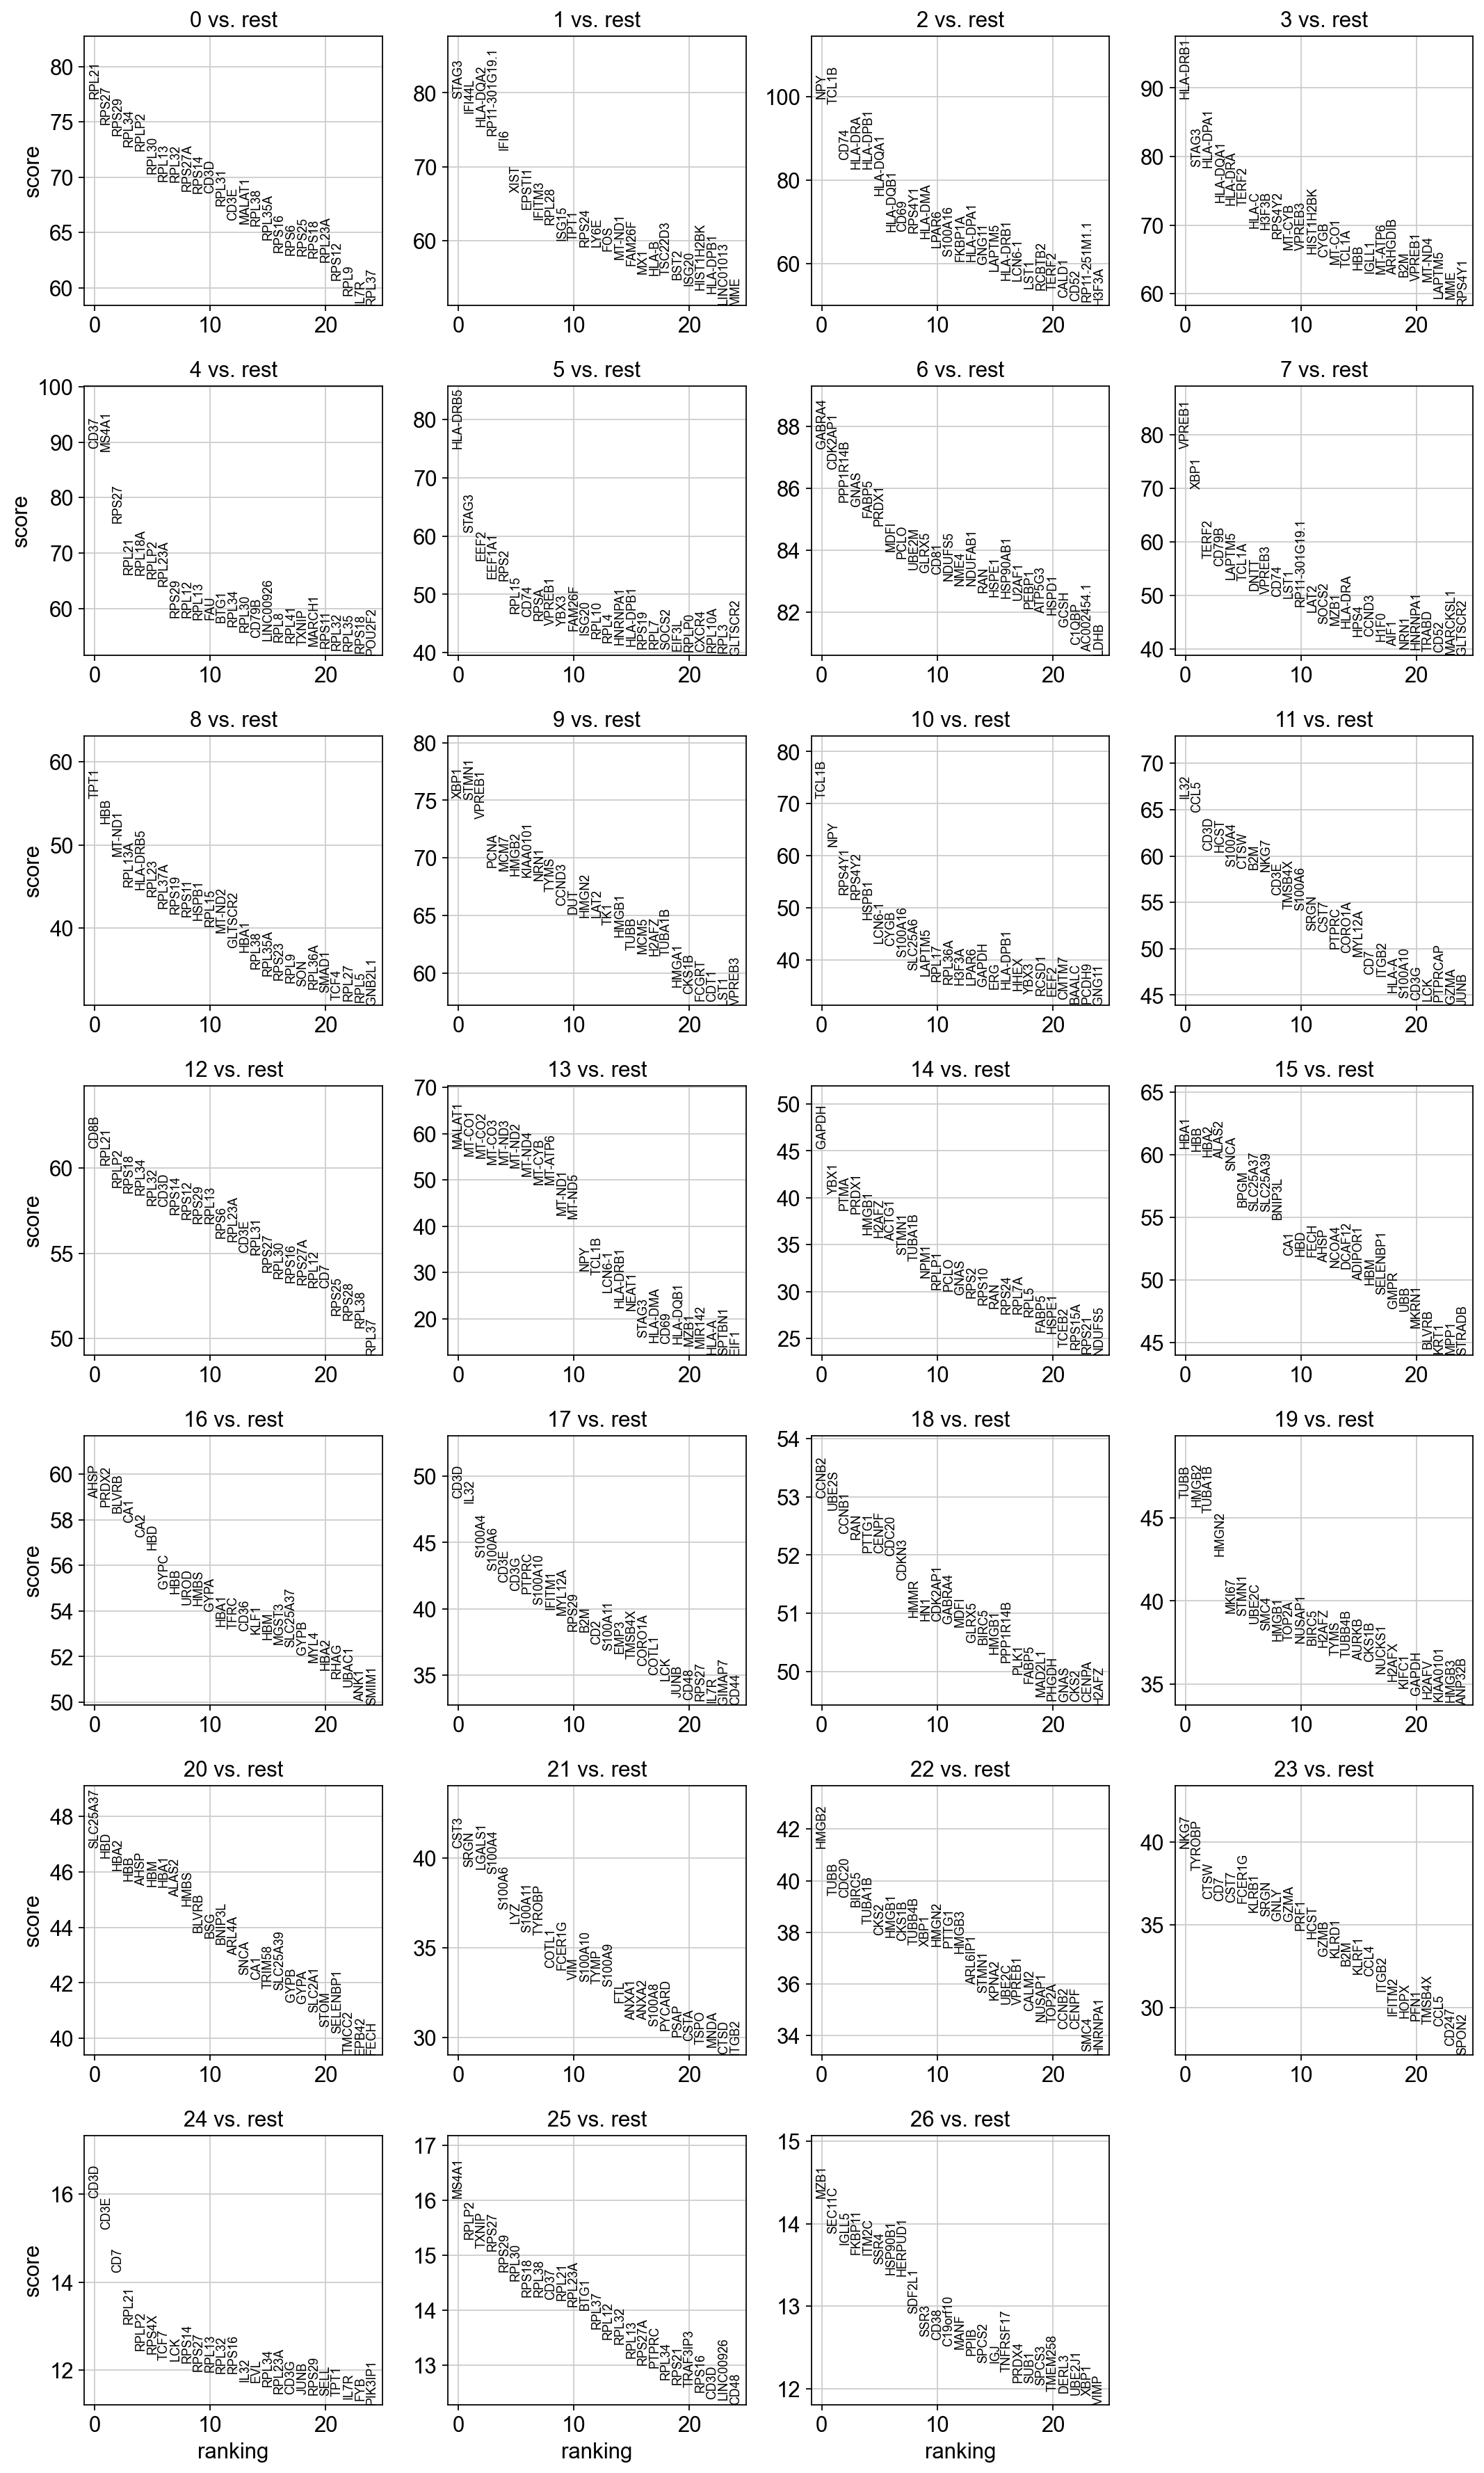

In [29]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [30]:
adata = sc.read(results_file)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


0              1         2         3      4         5       6  \
0  MALAT1          STAG3       NPY  HLA-DRB1   CD37      CD74    GNAS   
1    CD3D        HLA-DRA     TCL1B   HLA-DRA  MS4A1  HLA-DRB5     RAN   
2    CD3E       HLA-DPB1      CD74      CD74   CD74     STAG3  NDUFS5   
3    IL7R         IFI44L   HLA-DRA  HLA-DPA1  RPS27  HLA-DPB1   PEBP1   
4   PTPRC  RP11-301G19.1  HLA-DPB1     STAG3  CD79A     TCL1A   PRDX1   

         7         8       9  ...      17     18      19        20      21  \
0   VPREB1       HBB   STMN1  ...    CD3D    RAN  TUBA1B      HBA1  S100A4   
1     CD74   HLA-DRA  VPREB1  ...    IL32  STMN1   HMGB2       HBB    SRGN   
2  HLA-DRA    MT-ND1    XBP1  ...  S100A6   GNAS    TUBB      HBA2  LGALS1   
3     XBP1    MT-ND2   HMGB2  ...     B2M  H2AFZ   STMN1  SLC25A37    CST3   
4    TERF2  HLA-DRB5   HMGB1  ...    CD3E  SRSF9   HMGB1       HBD  S100A6   

       22      23      24      25       26  
0  TUBA1B    NKG7  RPL27A   RPLP2     MZB1  
1   HMGB2  TYROBP  RPL23A   RPS27   SEC11C  
2   STMN1     CD7  EEF1A1    BTG1  HSP90B1  
3    TUBB    CTSW   RPL31  RPL23A   FKBP11  
4    XBP1    CST7  RPL13A   RPL30    ITM2C  

[5 rows x 27 columns]

In [31]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(5)

0_n        0_s            1_n         1_s       2_n         2_s  \
0  MALAT1  90.310066          STAG3  146.583649       NPY  246.995438   
1    CD3D  83.386299        HLA-DRA  115.372581     TCL1B  215.552338   
2    CD3E  78.031433       HLA-DPB1  102.163963      CD74  181.428879   
3    IL7R  64.924126         IFI44L   99.378357   HLA-DRA  178.989090   
4   PTPRC  61.417656  RP11-301G19.1   98.148651  HLA-DPB1  161.045044   

        3_n         3_s    4_n         4_s  ...    22_n        22_s    23_n  \
0  HLA-DRB1  181.867905   CD37  152.175354  ...  TUBA1B  113.573380    NKG7   
1   HLA-DRA  165.024414  MS4A1  139.788574  ...   HMGB2  108.164062  TYROBP   
2      CD74  150.587357   CD74   87.474266  ...   STMN1  104.816757     CD7   
3  HLA-DPA1  144.505569  RPS27   78.272621  ...    TUBB   93.122459    CTSW   
4     STAG3  128.031128  CD79A   77.291756  ...    XBP1   90.291763    CST7   

         23_s    24_n       24_s    25_n       25_s     26_n       26_s  
0  131.634201  RPL27A  36.844715   RPLP2  44.158230     MZB1  33.917740  
1   75.948334  RPL23A  32.746166   RPS27  42.591251   SEC11C  25.500397  
2   63.172935  EEF1A1  31.221556    BTG1  40.077393  HSP90B1  23.075760  
3   60.185684   RPL31  31.007174  RPL23A  36.174194   FKBP11  22.172077  
4   59.100800  RPL13A  30.831604   RPL30  34.724770    ITM2C  21.668098  

[5 rows x 54 columns]

ranking genes
    finished (0:00:20)


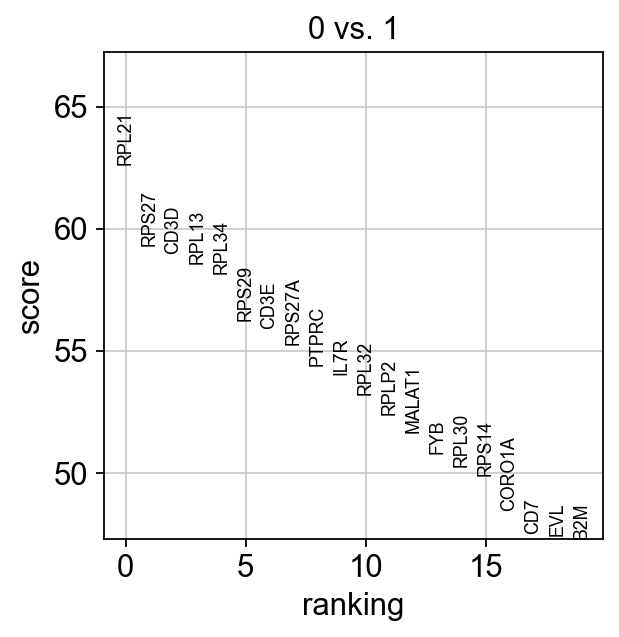

In [32]:
adata.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


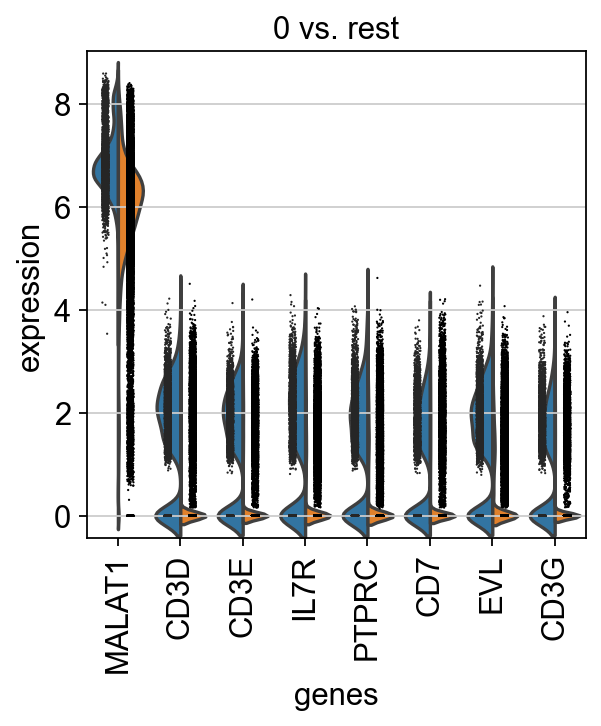

In [33]:
adata = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

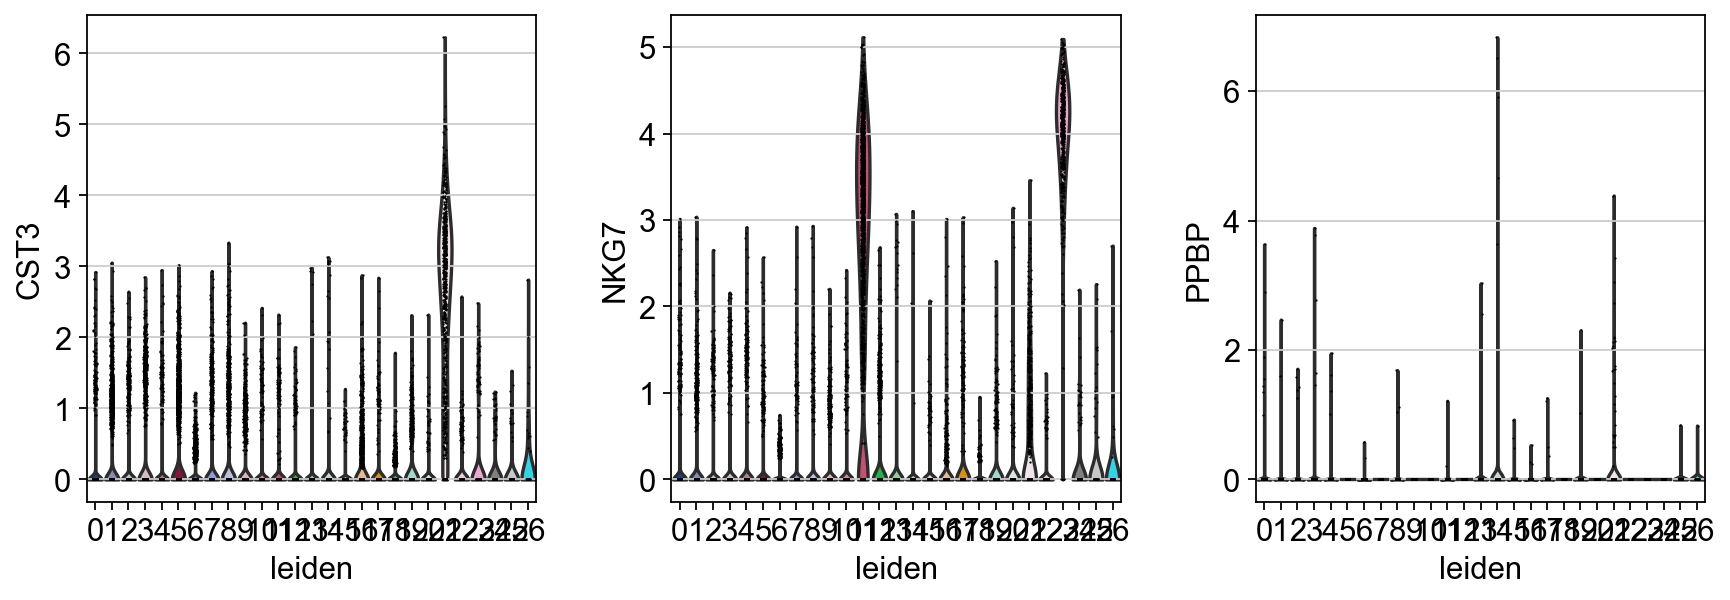

In [34]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


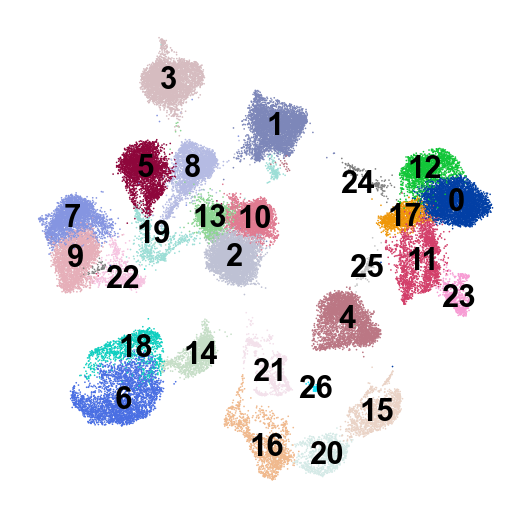

In [35]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [52]:
# cellmarker_dict = { 'T cell':['CD3D','CD3E', 'CD3G', 'CD8A','CD8A']
#                    'Tfolicularhelper': ['CXCR5','BCL6','PDCD1','CD40LG']
#                    'Erythroid1':['HBA1','HBA2','HBB',],
#                    'Erythroid2':['AHSP','BLVRD', 'PRDX2', 'HBB','CA1'],
#                    'Erythroid3':['HBA1','HBA2','HBB', 'SLC25A37','HBD'],
#                    'Plasma Cell': ['SEC11C', 'FKBP11','ITM2C','SDF2L1','HERPUD1'],
#                    'Naive B cell': ['MS4A1', 'P2RX5'],
#                    'NK': ['NKG7', 'CD7','TYROBP','SDF2L1','CST7'],
# }

cellmarker_dict = { 'T cell':['CD3D','CD3E', 'CD3G', 'CD8A','CD8A'],
                   'Tfolicularhelper': ['CXCR5','BCL6','PDCD1','CD40LG'],
                   'NK_CD56': ['XCL1', 'IL2RB', 'NCR1', 'FCER1G', 'NCAM1'],
                   'Tfh_naive': ['SELL', 'CXCR5', 'BCL6', 'CD40LG'],
                   'Treg': ['FOXP3', 'CTLA4', 'IL2RA'],
                   
}

#Cluster 15,16 and 20 I think is Erythrocyte
#Cluster 26 I think is plasma but ITM2C is mostly found in Distal enterocyte
#cluster 4 = Naive B
#Cluster 23


/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


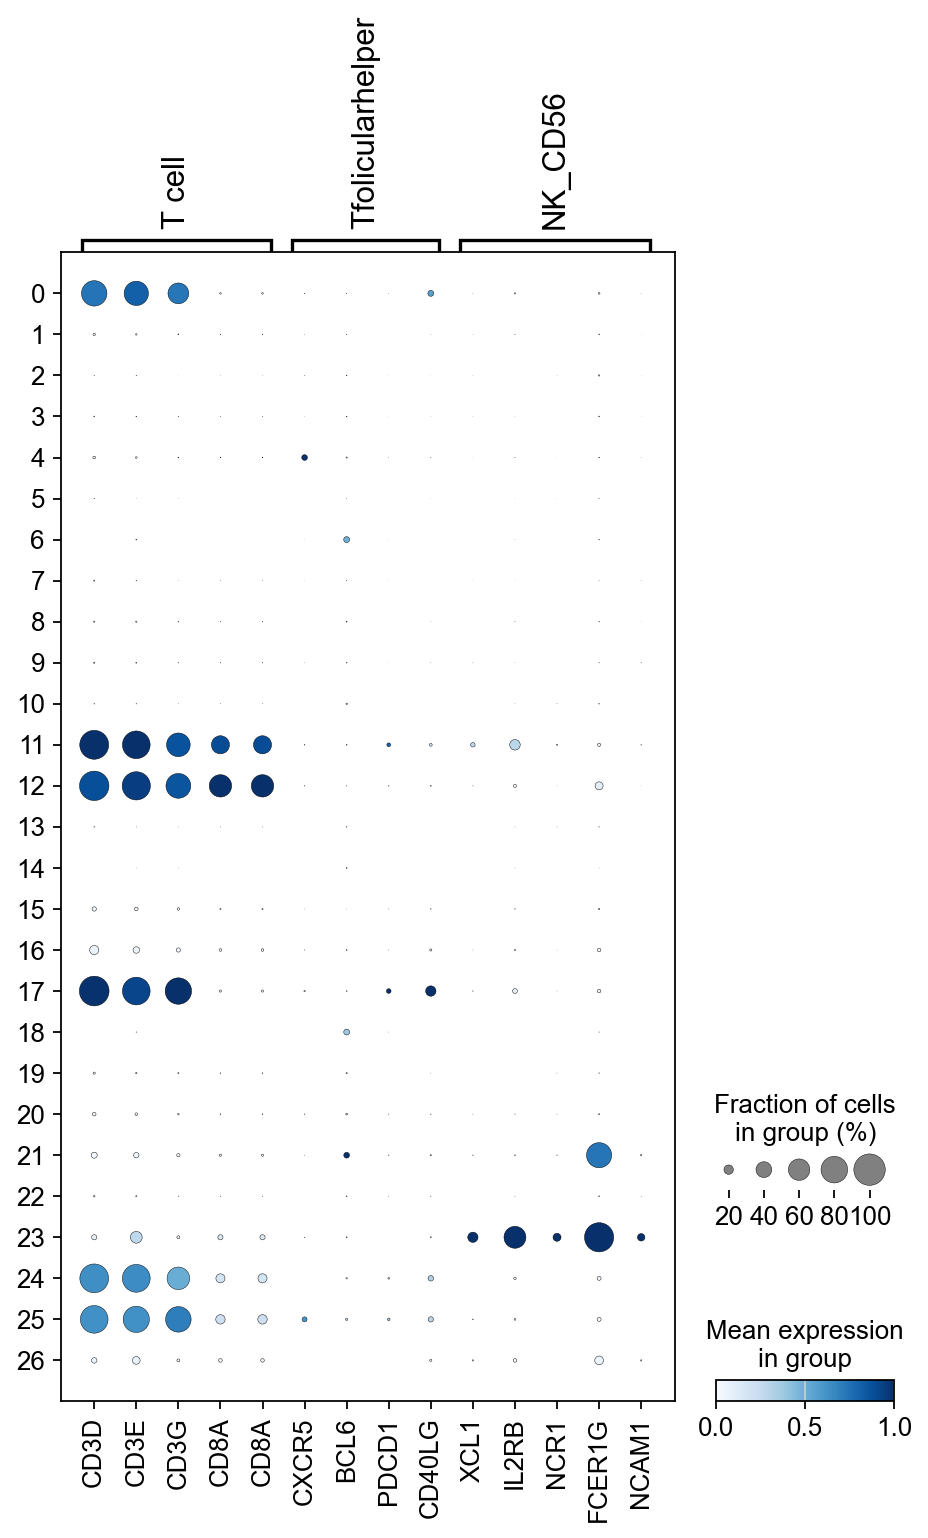

/Users/Ali/anaconda3/envs/MEDI7281/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


In [53]:
#sc.pl.dotplot(adata, marker_genes, groupby='leiden');
#sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key="wilcoxon", groupby="louvain_0.6")

sc.pl.dotplot(adata, cellmarker_dict, groupby='leiden', standard_scale='var',color_map='Blues')

sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, standard_scale = "var", color_map = "Blues", min_logfoldchange=2)

#sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);
#sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, standard_scale = "var", color_map = "Reds", min_logfoldchange=2)



In [56]:
adata
adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading
adata.raw.to_adata().write('./write/GSE148218_processed.h5ad', compression="gzip")

